In [1]:
import os
import sys
import numpy as np
from mindquantum.core.gates import *
from IPython.display import display_svg
from mindquantum.core.circuit import Circuit

sys.path.append('../..')
np.set_printoptions(linewidth=1000)
from utils import qutrit_symmetric_ansatz

`controlled_diagonal_synthesis()`
- GlobalPhase是否可以用PhaseShift替换
- 去除RY(-π)+CNOT+CNOT+RY(π)

`circuit_decomposition()`
- 检查是否还有别的可化简的部分
- 重构一份通用的电路遍历查找函数 写成.py


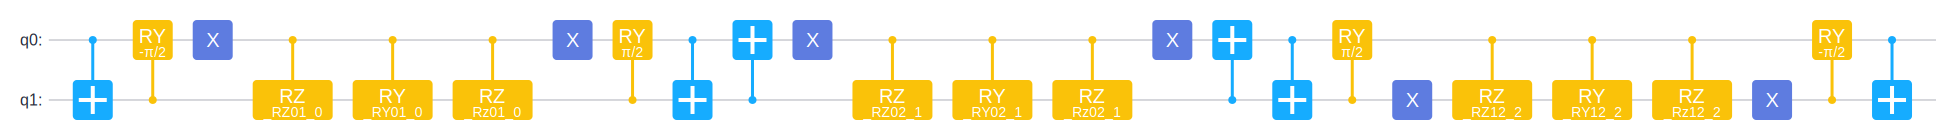

In [2]:
def draw_qpic(gate, ind):
    line = '_'
    name = gate.name
    obj = gate.obj_qubits
    ctrl = gate.ctrl_qubits
    pi2 = r'\frac{\pi}{2}'
    if len(ctrl) > 0:
        if 'X' == name:
            line = f'+q{obj[0]} q{ctrl[0]}'
        elif 'RY' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ q{ctrl[0]} width=28'
                else:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ q{ctrl[0]} width=32'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_y(-{pi2})$ q{ctrl[0]} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_y({pi2})$ q{ctrl[0]} width=28'
                else:
                    print(f'Some thing go wrong {gate}')
        elif 'RZ' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ q{ctrl[0]} width=28'
                else:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ q{ctrl[0]} width=32'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_z(-{pi2})$ q{ctrl[0]} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_z({pi2})$ q{ctrl[0]} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
        else:
            raise ValueError(f'Some thing go wrong {gate}')
    else:
        if 'X' == name:
            line = f'q{obj[0]} G $X$'
    return line, ind


def draw_pdf(path, ansatz, prefix, suffix):
    with open(path, 'w') as f:
        f.write(prefix)
        ind = 0
        for gate in ansatz:
            line, count = draw_qpic(gate, ind)
            ind = count
            f.write(f'{line}\n')
        f.write(suffix)
    os.system(f'python qpic {path} -f pdf')


path = 'single_qutrit_qpic.qpic'
prefix = r'''GATESIZE 14
DEPTHPAD 2
WIREPAD 6
q0 W
q1 W
q0 LABEL width=0
q0 q1 G $U_\mathrm{enc}(\boldsymbol{\theta})$ width=32
q0 LABEL width=0
=
'''
suffix = 'q0 LABEL width=0'
nq = 2
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
draw_pdf(path, ansatz, prefix, suffix)
ansatz.svg()

In [3]:
def draw_qpic(gate, ind):
    line = f'Some thing go wrong {str(gate)}'
    name = gate.name
    obj = gate.obj_qubits
    ctrl = gate.ctrl_qubits
    pi2 = r'\frac{\pi}{2}'
    if len(ctrl) > 0:
        ctrl_str = ' '.join([f'q{c}' for c in ctrl])
        if 'X' == name:
            line = f'+q{obj[0]} {ctrl_str}'
        elif 'RY' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                else:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ {ctrl_str} width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_y(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_y({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
            else:
                raise ValueError(f'Some thing go wrong {gate}')
        elif 'RZ' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                else:
                    line = f'q{obj[0]} G $R_z(\\theta_{{{ind}}})$ {ctrl_str} width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_z(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_z({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
            else:
                raise ValueError(f'Some thing go wrong {gate}')
        elif 'GP' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=32'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=36'
                else:
                    line = f'q{obj[0]} G $GP(\\theta_{{{ind}}})$ {ctrl_str} width=40'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $GP(-{pi2})$ {ctrl_str} width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $GP({pi2})$ {ctrl_str} width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
        else:
            raise ValueError(f'Some thing go wrong {gate}')
    else:
        if 'X' == name:
            line = f'q{obj[0]} G $X$'
        elif 'RY' == name:
            if len(gate.coeff.params_name) == 1:
                ind += 1
                if ind < 10:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=28'
                elif ind >= 10 and ind < 100:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=32'
                else:
                    line = f'q{obj[0]} G $R_y(\\theta_{{{ind}}})$ width=36'
            elif len(gate.coeff.params_name) == 0:
                if gate.coeff.const < 0:
                    line = f'q{obj[0]} G $R_y(-{pi2})$ width=35'
                elif gate.coeff.const > 0:
                    line = f'q{obj[0]} G $R_y({pi2})$ width=28'
                else:
                    raise ValueError(f'Some thing go wrong {gate}')
        else:
            raise ValueError(f'Some thing go wrong {gate}')
    return line, ind



path = 'two_qutrit_qpic.qpic'
prefix = r'''GATESIZE 14
DEPTHPAD 2
WIREPAD 6
q0 W
q1 W
q2 W
q3 W
q0 LABEL width=0
q0 q1 q2 q3 G $\large U_\mathrm{enc}(\boldsymbol{\theta})$ width=40
q0 LABEL width=0
=
'''
suffix = 'q2 LABEL width=0'
nq = 4
mat = np.eye(2**nq)
obj = range(nq)[::-1]
gate = UnivMathGate('U', mat).on(obj)
ansatz = qutrit_symmetric_ansatz(gate)
draw_pdf(path, ansatz, prefix, suffix)
ansatz.svg()